<a href="https://colab.research.google.com/github/Karanjithkaizoku/Personal-Data-analytics-projects/blob/main/Data_Analysis_project_2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score

In [2]:
data = pd.read_csv('/content/spotify_songs.csv')
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 26174 entries, 0 to 26173
Data columns (total 23 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   track_id                  26174 non-null  object 
 1   track_name                26169 non-null  object 
 2   track_artist              26169 non-null  object 
 3   track_popularity          26174 non-null  int64  
 4   track_album_id            26174 non-null  object 
 5   track_album_name          26169 non-null  object 
 6   track_album_release_date  26174 non-null  object 
 7   playlist_name             26174 non-null  object 
 8   playlist_id               26174 non-null  object 
 9   playlist_genre            26174 non-null  object 
 10  playlist_subgenre         26174 non-null  object 
 11  danceability              26174 non-null  float64
 12  energy                    26174 non-null  float64
 13  key                       26174 non-null  int64  
 14  loudne

In [3]:
data.isnull().sum()

track_id                    0
track_name                  5
track_artist                5
track_popularity            0
track_album_id              0
track_album_name            5
track_album_release_date    0
playlist_name               0
playlist_id                 0
playlist_genre              0
playlist_subgenre           0
danceability                0
energy                      0
key                         0
loudness                    0
mode                        0
speechiness                 0
acousticness                0
instrumentalness            0
liveness                    0
valence                     0
tempo                       0
duration_ms                 1
dtype: int64

In [4]:
data.dropna(inplace = True)
data.reset_index()

,index,track_id,track_name,track_artist,track_popularity,track_album_id,track_album_name,track_album_release_date,playlist_name,playlist_id,...,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,duration_ms
0,0,6f807x0ima9a1j3VPbc7VN,I Don't Care (with Justin Bieber) - Loud Luxur...,Ed Sheeran,66,2oCs0DGTsRO98Gh5ZSl2Cx,I Don't Care (with Justin Bieber) [Loud Luxury...,2019-06-14,Pop Remix,37i9dQZF1DXcZDD7cfEKhW,...,6,-2.634,1,0.0583,0.1020,0.000000,0.0653,0.518,122.036,194754.0
1,1,0r7CVbZTWZgbTCYdfa2P31,Memories - Dillon Francis Remix,Maroon 5,67,63rPSO264uRjW1X5E6cWv6,Memories (Dillon Francis Remix),2019-12-13,Pop Remix,37i9dQZF1DXcZDD7cfEKhW,...,11,-4.969,1,0.0373,0.0724,0.004210,0.3570,0.693,99.972,162600.0
2,2,1z1Hg7Vb0AhHDiEmnDE79l,All the Time - Don Diablo Remix,Zara Larsson,70,1HoSmj2eLcsrR0vE9gThr4,All the Time (Don Diablo Remix),2019-07-05,Pop Remix,37i9dQZF1DXcZDD7cfEKhW,...,1,-3.432,0,0.0742,0.0794,0.000023,0.1100,0.613,124.008,176616.0
3,3,75FpbthrwQmzHlBJLuGdC7,Call You Mine - Keanu Silva Remix,The Chainsmokers,60,1nqYsOef1yKKuGOVchbsk6,Call You Mine - The Remixes,2019-07-19,Pop Remix,37i9dQZF1DXcZDD7cfEKhW,...,7,-3.778,1,0.1020,0.0287,0.000009,0.2040,0.277,121.956,169093.0
4,4,1e8PAfcKUYoKkxPhrHqw4x,Someone You Loved - Future Humans Remix,Lewis Capaldi,69,7m7vv9wlQ4i0LFuJiE2zsQ,Someone You Loved (Future Humans Remix),2019-03-05,Pop Remix,37i9dQZF1DXcZDD7cfEKhW,...,1,-4.672,1,0.0359,0.0803,0.000000,0.0833,0.725,123.976,189052.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
26163,26168,5dvpipXxOIH96gcGEKR1Iu,Ain't Nothing Changed,Loyle Carner,60,6wjryxtrKxzTZID9kyZUV5,Yesterday's Gone,2017-01-20,Saxophone in Hip Hop - R&B Lounge - Jazz Rap,2ujrP2rPxu8ao7wNeG1ZOY,...,8,-8.073,1,0.1760,0.5050,0.059800,0.1150,0.149,90.011,194427.0
26164,26169,4brX8MJs5hxErgq48f9REO,Stay,Mac Miller,67,6f6tko6NWoH00cyFOl4VYQ,The Divine Feminine,2016-09-16,Saxophone in Hip Hop - R&B Lounge - Jazz Rap,2ujrP2rPxu8ao7wNeG1ZOY,...,6,-7.017,1,0.1390,0.5660,0.000135,0.6410,0.550,134.010,326427.0
26165,26170,4mbOTHs6heygME9uDHg0mf,Elusive,blackwave.,53,24aBKIQMXzdMYZkWSGFLTK,Elusive,2017-10-09,Saxophone in Hip Hop - R&B Lounge - Jazz Rap,2ujrP2rPxu8ao7wNeG1ZOY,...,5,-6.699,0,0.2190,0.3350,0.000000,0.2470,0.651,167.737,222200.0
26166,26171,5pCRjB4ODnrZQOKkeck7BU,Hands Up!,blackwave.,30,7wBFAwlNweZXefYOzi0Lod,Mic Check,2017-05-12,Saxophone in Hip Hop - R&B Lounge - Jazz Rap,2ujrP2rPxu8ao7wNeG1ZOY,...,0,-8.145,1,0.3750,0.2970,0.000043,0.1190,0.581,87.423,219900.0


In [5]:
data.isnull().sum()

track_id                    0
track_name                  0
track_artist                0
track_popularity            0
track_album_id              0
track_album_name            0
track_album_release_date    0
playlist_name               0
playlist_id                 0
playlist_genre              0
playlist_subgenre           0
danceability                0
energy                      0
key                         0
loudness                    0
mode                        0
speechiness                 0
acousticness                0
instrumentalness            0
liveness                    0
valence                     0
tempo                       0
duration_ms                 0
dtype: int64

<ipython-input-6-66032fbdd12f>:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  correlation = data.corr()


<Axes: >

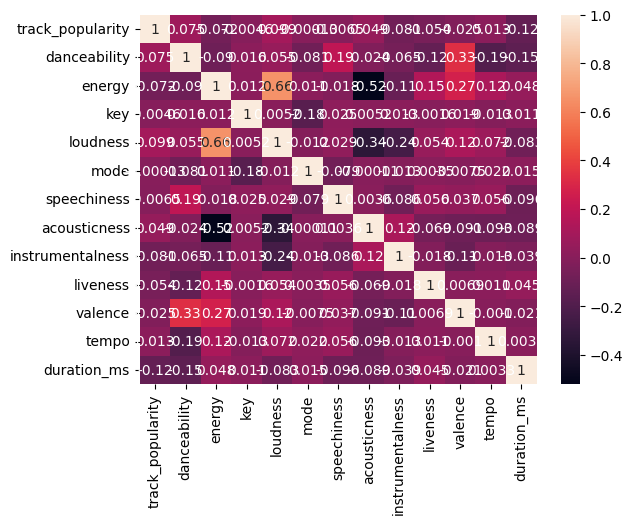

In [6]:
correlation = data.corr()
sns.heatmap(correlation , annot = True, color = 'red')

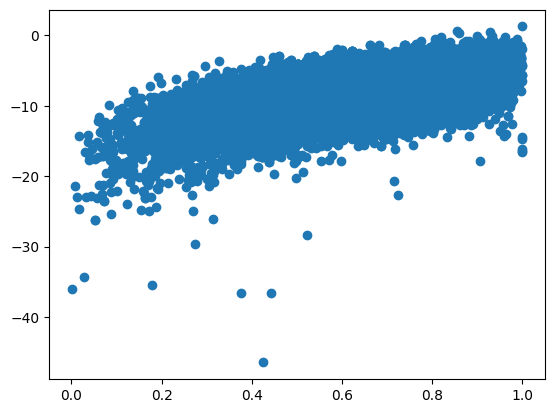

In [7]:
plt.scatter(x=data['energy'], y = data['loudness'])
plt.show()

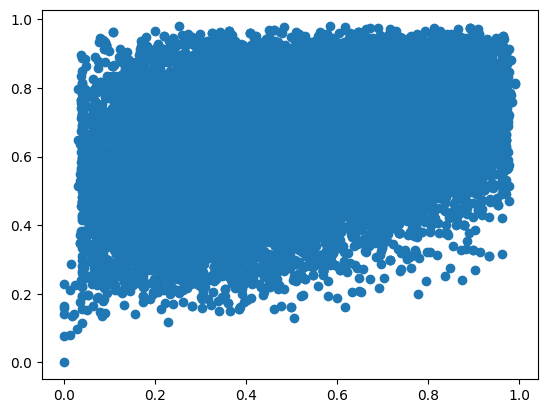

In [29]:
plt.scatter(x = data['valence'], y = data['danceability'])
plt.show()

In [9]:
x = data[['energy']].astype(int)
y = data[['loudness']].astype(int)
x_train, x_test, y_train, y_test = train_test_split(x , y, test_size = 0.3)

In [10]:
linear = LinearRegression()
linear.fit(x_train, y_train)

LinearRegression()

In [11]:
y_pred = linear.predict(x_test)

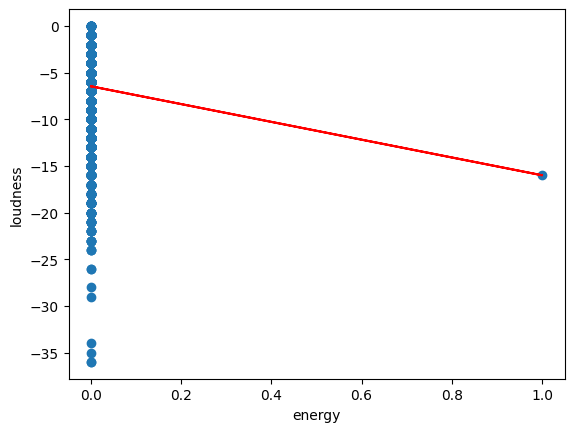

In [23]:
plt.scatter(x_train, y_train)
plt.plot(x_test, y_pred, color = 'red')
plt.xlabel("energy")
plt.ylabel("loudness")
plt.show()

In [24]:
mse = mean_squared_error(y_pred, y_test)
mse

9.38428655850057